In [53]:
import pandas as pd
import numpy as np
from collections import Counter

In [9]:
df_train = pd.read_csv('../data/round1_ijcai_18_train_20180301.txt', sep=' ')
df_test = pd.read_csv('../data/round1_ijcai_18_test_a_20180301.txt', sep=' ')

# remove duplicates

In [32]:
print(df_train.shape)
print(df_train.duplicated().sum())
df_train = df_train.drop_duplicates()
print(df_train.duplicated().sum())
print(df_train.shape)

27
0
(478111, 27)


In [3]:
df_train.head(100)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
5,7764762765372067286,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4003,5799347067982556520:9172976955054793469;871073...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
6,6956333474094867789,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,2011981573061447208:7199361004668592209;827733...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
7,8387099821892927911,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,2011981573061447208:7199361004668592209;827733...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
8,4021878205550012615,5202355029344881809,7908382889764677758;5755694407684602296,2072967855524022579;5131280576272319091;263639...,5520678735822176314,548352491538518780,8,9,10,16,...,4001,5755694407684602296:-1;5799347067982556520:-1;...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
9,6499571365974135517,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4003,8277336076276184272:820214312075361939;5096600...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0


# statistical analysis

In [3]:
df_train.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.00000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.838444e+18,5.500420e+18,6.777175,11.13384,12.199336,17.128676,4.609864e+18,0.213047,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994830,5013.175240,0.971124,0.970497,0.974863,0.018867
std,2.663448e+18,2.710140e+18,2.694756e+18,2.464881e+18,1.089037,2.58886,2.497312,2.160745,2.663355e+18,0.514699,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.011972,2.590989,0.023817,0.023776,0.025024,0.136055
min,3.823219e+12,6.964907e+14,-1.000000e+00,-1.000000e+00,0.000000,-1.00000,0.000000,0.000000,2.477979e+13,-1.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,-1.000000,4999.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.00000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966360,0.965684,0.969268,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.00000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.00000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.00000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_test.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_id,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
count,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,...,1.837100e+04,1.837100e+04,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,4.607419e+18,4.582686e+18,4.845199e+18,5.557806e+18,6.837951,11.109194,12.228621,17.035382,4.594443e+18,0.220946,...,4.642666e+18,1.537862e+09,4003.377171,4.717927e+18,15.816123,0.994915,5013.228948,0.971321,0.970459,0.975041
std,2.674410e+18,2.700034e+18,2.707568e+18,2.444534e+18,1.046772,2.666971,2.549283,2.237930,2.665790e+18,0.516688,...,2.661417e+18,1.937280e+04,4.022065,2.604679e+18,2.879969,0.008981,2.646194,0.017264,0.017252,0.018832
min,1.772728e+14,1.097631e+15,-1.000000e+00,-1.000000e+00,1.000000,-1.000000,0.000000,0.000000,1.794514e+14,-1.000000,...,1.120952e+13,1.537805e+09,4001.000000,1.205713e+16,1.000000,0.870588,5000.000000,-1.000000,-1.000000,-1.000000
25%,2.287309e+18,2.251088e+18,2.351872e+18,3.948283e+18,6.000000,10.000000,11.000000,16.000000,2.300070e+18,0.000000,...,2.369361e+18,1.537848e+09,4001.000000,2.527080e+18,14.000000,0.992824,5012.000000,0.966399,0.965516,0.969490
50%,4.627598e+18,4.668472e+18,5.051040e+18,7.322157e+18,7.000000,11.000000,13.000000,17.000000,4.566476e+18,0.000000,...,4.655476e+18,1.537863e+09,4001.000000,4.598382e+18,16.000000,1.000000,5013.000000,0.972481,0.971511,0.978514
75%,6.928380e+18,7.002632e+18,7.555983e+18,7.534239e+18,8.000000,13.000000,14.000000,19.000000,6.893871e+18,0.000000,...,6.932690e+18,1.537878e+09,4004.000000,6.740687e+18,18.000000,1.000000,5015.000000,0.977937,0.976823,0.983543
max,9.222350e+18,9.221980e+18,9.222396e+18,9.151271e+18,10.000000,17.000000,17.000000,21.000000,9.222798e+18,2.000000,...,9.223243e+18,1.537891e+09,4020.000000,9.220773e+18,23.000000,1.000000,5020.000000,1.000000,1.000000,1.000000


# comparing categorical features in train and test data

In [33]:
print('train: ', df_train.shape)
cols_to_see = ['instance_id', 'item_id', 'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level', 
               'item_collected_level', 'item_pv_level', 'user_gender_id','shop_id', 'user_id', 'context_id', 
               'context_page_id', 'shop_review_num_level', 'user_age_level', 'user_occupation_id', 'user_star_level',
              'shop_star_level']
for col in cols_to_see:
    print('%s : %d' % (col, len(df_train[col].unique())))
print('*' * 50)    

print('test: ', df_test.shape)
for col in cols_to_see:
    print('%s : %d' % (col, len(df_test[col].unique())))
print('*' * 50)   

print('common')
for col in cols_to_see:
    print(col + ':', len(set([ele for ele in df_test[col] if ele in df_train[col]])))

train:  (478111, 27)
instance_id : 478087
item_id : 10075
item_brand_id : 2055
item_city_id : 128
item_price_level : 14
item_sales_level : 18
item_collected_level : 18
item_pv_level : 22
user_gender_id : 4
shop_id : 3959
user_id : 197694
context_id : 478111
context_page_id : 20
shop_review_num_level : 25
user_age_level : 9
user_occupation_id : 5
user_star_level : 12
shop_star_level : 22
**************************************************
test:  (18371, 26)
instance_id : 18371
item_id : 3695
item_brand_id : 1101
item_city_id : 99
item_price_level : 10
item_sales_level : 18
item_collected_level : 18
item_pv_level : 21
user_gender_id : 4
shop_id : 2015
user_id : 13573
context_id : 18371
context_page_id : 20
shop_review_num_level : 21
user_age_level : 9
user_occupation_id : 5
user_star_level : 12
shop_star_level : 20
**************************************************
common
instance_id: 0
item_id: 0
item_brand_id: 0
item_city_id: 0
item_price_level: 10
item_sales_level: 17
item_collected_le

# timestamp processing

In [5]:
print(len(df_train['context_timestamp'].unique()))
print(df_train.shape)
print(df_train['context_timestamp'].describe())

281824
(478138, 27)
count    4.781380e+05
mean     1.537502e+09
std      1.726222e+05
min      1.537200e+09
25%      1.537351e+09
50%      1.537506e+09
75%      1.537635e+09
max      1.537805e+09
Name: context_timestamp, dtype: float64


In [31]:
import datetime
t1 = datetime.datetime.fromtimestamp(1.537209e+09)
print(t1, t1.hour, t1.minute)
print(datetime.datetime.fromtimestamp(1.537805e+09))
print(datetime.datetime.fromtimestamp(1537718400))

2018-09-18 02:30:00 2 30
2018-09-25 00:03:20
2018-09-24 00:00:00


### extract hour and minute info

# data spliting according to timestamp

In [38]:
split_time = 1537718400
train, val = df_train.loc[df_train['context_timestamp'] < 1537718400, :], df_train.loc[df_train['context_timestamp'] >= 1537718400, :]

In [39]:
print(train.shape)
print(val.shape)
print(train['is_trade'].sum() / train.shape[0])
print(val['is_trade'].sum() / val.shape[0])
train.to_csv('../data/train.csv', index=False)
val.to_csv('../data/val.csv', index=False)

(420693, 27)
(57418, 27)
0.019078045035215704
0.016858824758786445


# bar and pair plot of some features

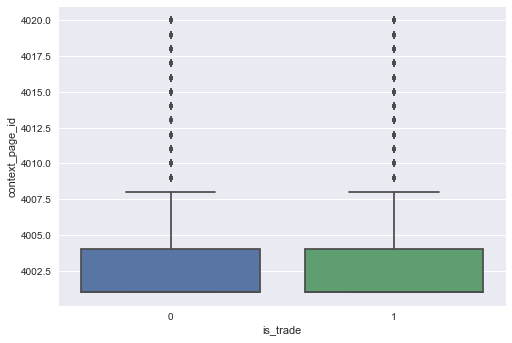

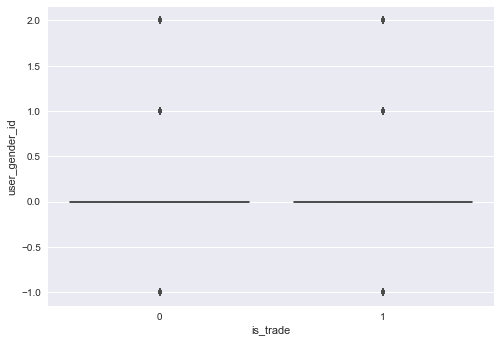

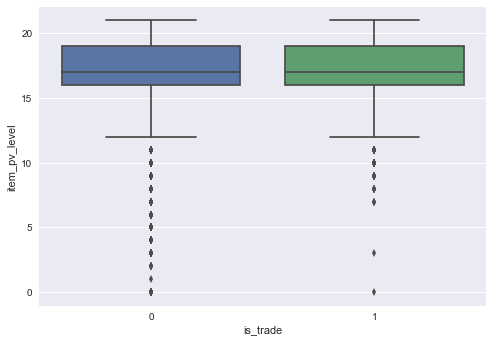

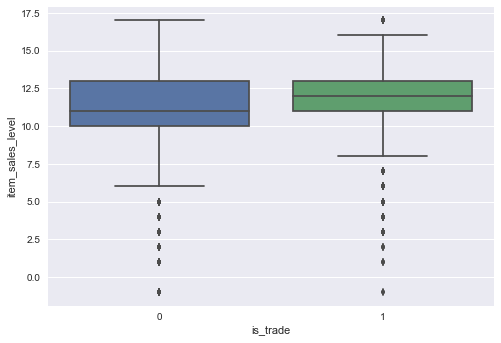

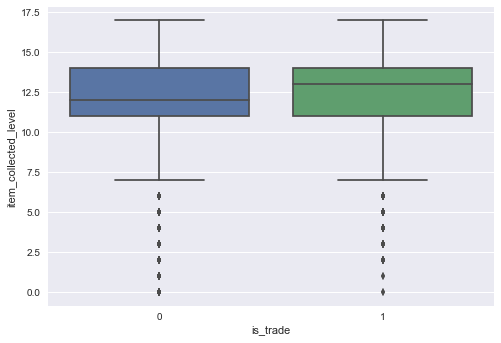

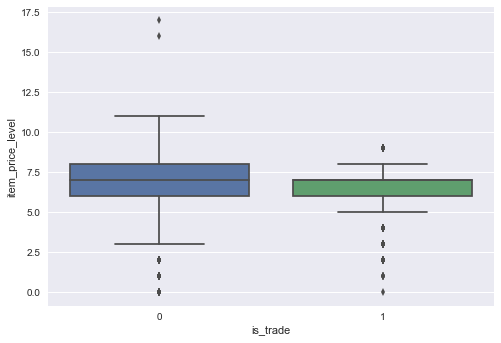

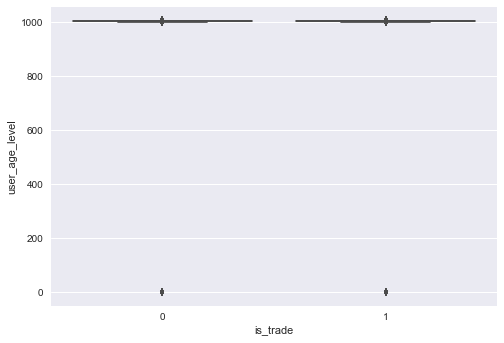

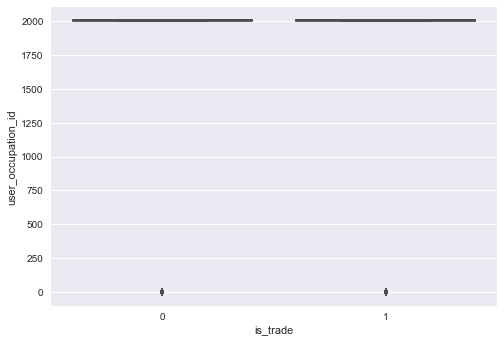

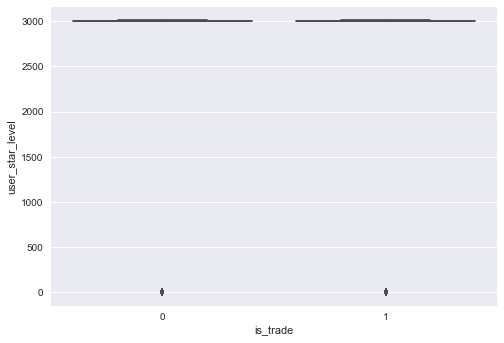

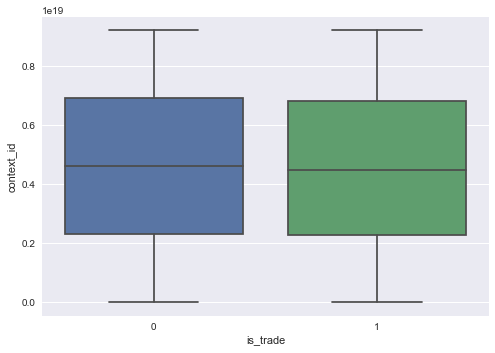

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['context_page_id', 'user_gender_id', 'item_pv_level', 'item_sales_level', 'item_collected_level', 'item_price_level', 
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id']
for col in cols: 
    ax = sns.boxplot(x="is_trade", y=col, data=df_train)
    plt.show()

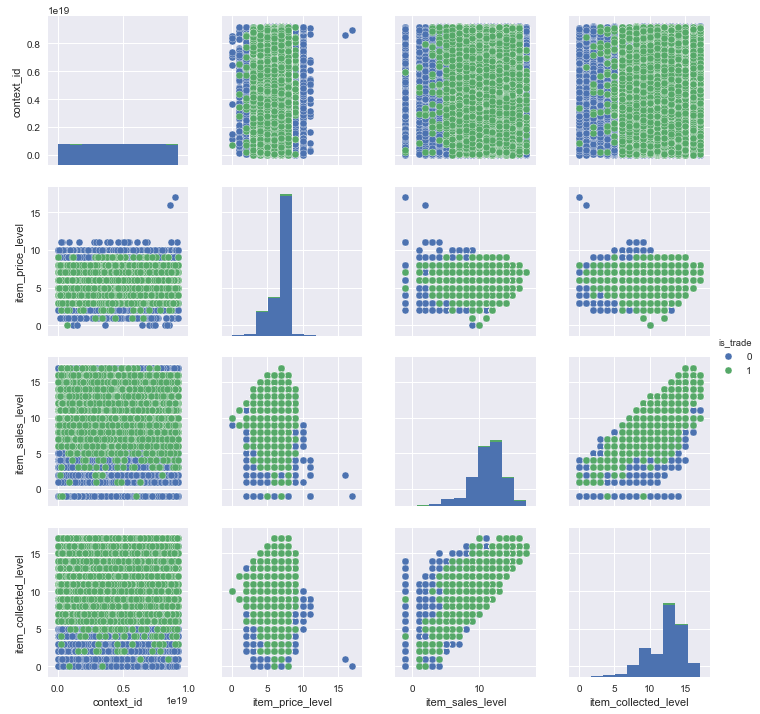

In [46]:
cols = ['item_price_level', 'item_sales_level', 'item_collected_level']
g = sns.pairplot(df_train, vars=cols, hue='is_trade')
plt.show()

# property and category processing

In [71]:
def get_c(c_list, pos):
    terms = c_list.split(';')
    if pos >= len(terms):
        return None
    else:
        return terms[pos]
    
def sub_cat(df, flag = 'train'):
    c1 = list(map(lambda x: get_c(x, 0),  df['item_category_list']))
    c2 = list(map(lambda x: get_c(x, 1),  df['item_category_list']))
    c3 = list(map(lambda x: get_c(x, 2),  df['item_category_list']))
    ct1 = Counter(c1)
    ct2 = Counter(c2)
    ct3 = Counter(c3)
    print('*' * 50)
    if flag == 'train':
        print('train: ')
    else:
        print('test: ')
    print(ct1)
    print(ct2)
    print(ct3)
    category_tree = list(map(lambda x: len(x.split(';')), df['item_category_list']))
    print(np.unique(category_tree))
    print(len(c1))
    c1_set = set(c1)
    c2_set = set(c2)
    c3_set = set(c3)
    print(c1_set, c2_set, c3_set)
    c1_c2_cross = [ele for ele in c1_set if ele in c2_set]
    c2_c3_cross = [ele for ele in c2_set if ele in c3_set]
    print(len(c1_c2_cross))
    print(len(c2_c3_cross))
    return ct1 + ct2 + ct3

cat_all_1 = sub_cat(df_train)
cat_all_2 = sub_cat(df_test, 'test')
print('*' * 50)
print(len(cat_all_1))
print([ele for ele in cat_all_2 if ele not in cat_all_1])

**************************************************
train: 
Counter({'7908382889764677758': 478111})
Counter({'8277336076276184272': 150775, '5755694407684602296': 102494, '509660095530134768': 75418, '5799347067982556520': 72014, '7258015885215914736': 53041, '2011981573061447208': 9563, '8710739180200009128': 7084, '3203673979138763595': 2246, '2642175453151805566': 2029, '2436715285093487584': 1966, '4879721024980945592': 1207, '1968056100269760729': 186, '22731265849056483': 88})
Counter({None: 476082, '8868887661186419229': 1906, '6233669177166538628': 123})
[2 3]
478111
{'7908382889764677758'} {'5799347067982556520', '22731265849056483', '3203673979138763595', '2436715285093487584', '2011981573061447208', '2642175453151805566', '7258015885215914736', '5755694407684602296', '8710739180200009128', '509660095530134768', '1968056100269760729', '8277336076276184272', '4879721024980945592'} {None, '6233669177166538628', '8868887661186419229'}
0
0
****************************************

In [60]:
p1 = list(map(lambda x: x.split(';'), df_train['item_property_list']))
p2 = list(map(lambda x: x.split(';'), df_test['item_property_list']))

p1_all = [j_ for i_ in p1 for j_ in i_]
p2_all = [j_ for i_ in p2 for j_ in i_]

print('train: ')
ct1 = Counter(p1_all)
print(ct1)

train: 
Counter({'2636395404473730413': 413378, '5131280576272319091': 366342, '9148482949976129397': 327423, '6491818071284064879': 317707, '1243768796732904674': 273753, '4678095570925618478': 268428, '2033679869864207699': 228498, '7344985833148694227': 193955, '2865114645280905956': 192822, '1761412768692736998': 192390, '3166429252072587416': 192015, '3678744968589068672': 191834, '6006263212053312506': 185844, '7674886545904137373': 183641, '761358417052169692': 183444, '6590137080806521280': 182571, '5156135912143377577': 182114, '1248784780798586835': 181876, '7813953447682596156': 180268, '3741959602660197915': 178166, '8511978268505564147': 175338, '1782439090818545916': 170909, '2072967855524022579': 165283, '5172685342804830679': 165226, '6072714026257332214': 163174, '720840888466250585': 152974, '4067341101015777832': 152468, '7046835092279798919': 149223, '360508730875480086': 144115, '5117290135792467652': 140991, '2008359857263316777': 129652, '8851425427477388664': 12

In [61]:
print('test: ')
ct2 = Counter(p2_all)
print(ct2)

p1_set = set(p1_all)
p2_set = set(p2_all)
print(len(p1_set))
print(len(p2_set))
print(len([ele for ele in p2_set if ele not in p1_set]))

test: 
Counter({'2636395404473730413': 15833, '5131280576272319091': 13898, '9148482949976129397': 12519, '6491818071284064879': 11809, '1243768796732904674': 10748, '4678095570925618478': 10038, '2033679869864207699': 9101, '1761412768692736998': 7831, '3166429252072587416': 7815, '3678744968589068672': 7797, '6006263212053312506': 7542, '761358417052169692': 7485, '7674886545904137373': 7485, '5156135912143377577': 7455, '6590137080806521280': 7455, '1248784780798586835': 7423, '7344985833148694227': 7370, '3741959602660197915': 7243, '2865114645280905956': 7168, '8511978268505564147': 7158, '1782439090818545916': 6719, '5172685342804830679': 6692, '7813953447682596156': 6549, '6072714026257332214': 6236, '2072967855524022579': 5899, '720840888466250585': 5863, '4067341101015777832': 5718, '5117290135792467652': 5616, '7046835092279798919': 5555, '360508730875480086': 5374, '2008359857263316777': 4945, '8851425427477388664': 4717, '4621934203383159480': 4525, '3965165427527476577': 4

In [72]:
pred_c1 = list(map(lambda x: [ele.split(':')[0] for ele in x.split(';')],  df_train['item_category_list']))
pred_c2 = list(map(lambda x: [ele.split(':')[0] for ele in x.split(';')],  df_test['item_category_list']))
pred_c1_all = [j_ for i_ in pred_c1 for j_ in i_]
pred_c2_all = [j_ for i_ in pred_c2 for j_ in i_]
ct1 = Counter(pred_c1_all)
ct2 = Counter(pred_c2_all)
print(len(ct1))
print(ct1)
print(ct2)
print(len([ele for ele in ct2 if ele not in ct1]))
print([ele for ele in ct1 if ele not in cat_all_1])

16
Counter({'7908382889764677758': 478111, '8277336076276184272': 150775, '5755694407684602296': 102494, '509660095530134768': 75418, '5799347067982556520': 72014, '7258015885215914736': 53041, '2011981573061447208': 9563, '8710739180200009128': 7084, '3203673979138763595': 2246, '2642175453151805566': 2029, '2436715285093487584': 1966, '8868887661186419229': 1906, '4879721024980945592': 1207, '1968056100269760729': 186, '6233669177166538628': 123, '22731265849056483': 88})
Counter({'7908382889764677758': 18371, '8277336076276184272': 6098, '5755694407684602296': 4033, '509660095530134768': 2932, '5799347067982556520': 2726, '7258015885215914736': 1464, '2011981573061447208': 373, '8710739180200009128': 304, '3203673979138763595': 223, '2642175453151805566': 79, '8868887661186419229': 75, '2436715285093487584': 72, '4879721024980945592': 55, '1968056100269760729': 10, '6233669177166538628': 4, '22731265849056483': 2})
0
[]


###  seperate fields: sub_cate (+ sub_sub_cate)
###  drop '7908382889764677758'
###  train: property count < 10  ==>  'R'      multipe times  sum
###  test:  not in train  ==>  'R'

In [84]:
def count_property(pred, item):
    '''
    aims to count how many common property labels pred and item have

    pred: a string   5799347067982556520:-1;509660095530134768:-1
    item: a string   2072967855524022579;5131280576272319091
    '''
    items = set(item.split(';'))
    pred = set([ele.split(':')[1] for ele in pred.split(';')])
    if pred == '-1':
        return 0
    if '-1' in pred:
        pred.remove('-1')
    common = items & pred
    return len(common)

count_p = []
for row in df_train.itertuples():
    try:
        pred = row.predict_category_property
        item = row.item_property_list
        count_p.append(count_property(pred, item))
    except:
        print(pred)
        print(item)
        count_p.append(0)

-1
5131280576272319091;2636395404473730413;6523907184013144830;9148482949976129397;6491818071284064879;4678095570925618478;2033679869864207699;3802510553218572927;360508730875480086;4293046575640871844;5117290135792467652;6518827169254436786;1248848811491612718;7046835092279798919;3632233000683703193;2865114645280905956;357954758031852148;2008359857263316777;9186000847964263543;968231669345392659;8511978268505564147;5172685342804830679;5156135912143377577;726661490058300850;3508235292776641398;1248784780798586835;2774069409510787778;8778097678320011358;761358417052169692;3166429252072587416;6006263212053312506;1761412768692736998;3678744968589068672;6590137080806521280;7674886545904137373;4969439333471645763
-1
2072967855524022579;5131280576272319091;2636395404473730413;3163265386149801264;302719828435032992;1243768796732904674;9148482949976129397;4875993958863530301;6491818071284064879;6072714026257332214;4678095570925618478;2033679869864207699;3965165427527476577;820214312075361939;4

In [88]:
print(np.unique(count_p))
from collections import Counter
ct = Counter(count_p)
print(ct)
print(len(count_p))
print(df_train.shape)
df_train['count_p'] = count_p
sns.boxplot(x="is_trade", y='count_p', data=df_train)
plt.show()

[0 1 2 3]
Counter({1: 250673, 0: 214299, 2: 12636, 3: 503})
478111
(478111, 27)


# correlation

In [94]:
cols = ['item_collected_level', 'item_price_level', 'is_trade']
df_corr = df_train.loc[:, cols]
df_corr.corr()

,item_collected_level,item_price_level,is_trade
item_collected_level,1.000000,0.083144,0.013856
item_price_level,0.083144,1.000000,-0.055538
is_trade,0.013856,-0.055538,1.000000


# feature selection

In [ ]:
cols_selected = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 
                 'user_gender_id', 'context_page_id', 'shop_review_num_level', 'user_age_level', 'user_age_level', 
                'user_star_level', 'user_star_level']